# 範例 : 計程車費率預測
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

# [作業目標]
- 試著模仿範例寫法, 使用程車費率預測競賽練習時間欄位處理

# [作業重點]
- 新增星期幾(day of week)與第幾周(week of year)這兩項特徵, 觀察有什麼影響 (In[4], Out[4], In[5], Out[5])
- 新增加上年週期與周周期特徵 , 觀察有什麼影響 (In[8], Out[8], In[9], Out[9]) 

In [67]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

data_path = '/Users/justin/Desktop/100daysML/data/'
df = pd.read_csv(data_path + 'taxi_data1.csv')

train_Y = df['fare_amount']
df = df.drop(['fare_amount'] , axis=1)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-10-21 23:54:10 UTC,-73.990580,40.761071,-73.981128,40.758634,2
1,2015-02-03 10:42:03 UTC,-73.988403,40.723431,-73.989647,40.741695,1
2,2014-03-16 18:58:58 UTC,-74.015785,40.715110,-74.012029,40.707888,2
3,2009-06-13 16:10:54 UTC,-73.977322,40.787275,-73.958030,40.778838,3
4,2014-06-12 03:25:56 UTC,-73.989683,40.729717,-73.982490,40.761887,3


In [68]:
# 時間特徵分解方式:使用datetime
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC'))
df['pickup_year'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%Y')).astype('int64')
df['pickup_month'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%m')).astype('int64')
df['pickup_day'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%d')).astype('int64')
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%H')).astype('int64')
df['pickup_minute'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%M')).astype('int64')
df['pickup_second'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%S')).astype('int64')
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


In [69]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(df_temp)
Linear = LinearRegression()
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
GDBT = GradientBoostingRegressor()
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Linear Reg Score : 0.026876871475636888
Gradient Boosting Reg Score : 0.7117888939522878


# 作業1
* 對照範例，試著加入星期幾 (day of week) 與第幾周 (week of year) 這兩項特徵，  
看看結果會比原本只有時間特徵分解的結果更好或更差?

In [70]:
df.dtypes


pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
pickup_year                   int64
pickup_month                  int64
pickup_day                    int64
pickup_hour                   int64
pickup_minute                 int64
pickup_second                 int64
dtype: object

In [71]:
# 加入星期幾與第幾周兩個特徵

# weekday
df["Weekday"] = df['pickup_datetime'].apply(lambda x:x.weekday())


def get_week(date):
    if date<=7:
        week =1
    elif date>7 and date<=14:
        week =2
    elif date >14 and date<=21:
        week =3
    else:
        week =4
    return week

df['Week'] = df['pickup_day'].apply(lambda x:get_week(x))
df.head(5)



,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,Weekday,Week
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,4,3
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,1,1
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,6,3
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,5,2
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,3,2


In [72]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.02660787105113498


/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Gradient Boosting Reg Score : 0.7111618187399417


In [79]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,Weekday,Week,day_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,4,3,-0.025450
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,1,1,0.333601
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,6,3,-0.967083
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,5,2,-0.888817
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,3,2,0.782427


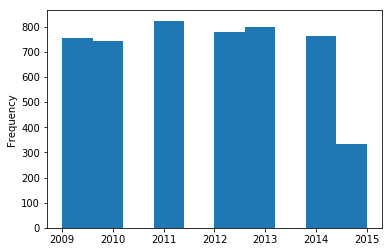

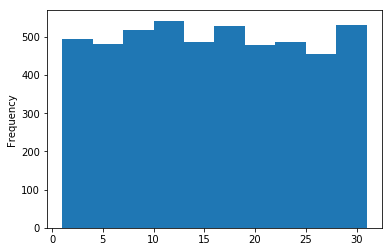

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,...,week_2,week_3,week_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,...,0,1,0,0,0,0,0,1,0,0
1,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,...,0,0,0,0,1,0,0,0,0,0
2,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,...,0,1,0,0,0,0,0,0,0,1
3,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,...,1,0,0,0,0,0,0,0,1,0
4,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,...,1,0,0,0,0,0,1,0,0,0


In [99]:
## get rid of unnecessary variables
# dummy variable for week
week_dummies = pd.get_dummies(df['Week'])
week_dummies.columns = ['week_1','week_2','week_3','week_4']
# dummy variable for weekday
weekday_dummies = pd.get_dummies(df['Weekday'])
weekday_dummies.columns = ['weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']


df = pd.concat([df,week_dummies],axis =1)
df = pd.concat([df,weekday_dummies],axis =1)
df_temp = df.drop(['pickup_datetime','Week','Weekday'] , axis =1)
df_temp.head(5)

import matplotlib.pyplot as plt
df_temp['pickup_year'].plot(kind="hist")
plt.show()

df_temp['pickup_day'].plot(kind="hist")
plt.show()

df_temp.head(5)



In [100]:
# no scaling
Linear = LinearRegression()
print(f'Linear Reg Score : {cross_val_score(Linear, df_temp, train_Y, cv=10).mean()}')
GDBT = GradientBoostingRegressor()
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, df_temp, train_Y, cv=10).mean()}')


# Linear Reg Score : 0.018966954338142005
# Gradient Boosting Reg Score : 0.7111198907054815

Linear Reg Score : 0.018966954338142005
Gradient Boosting Reg Score : 0.7111198907054815


In [107]:
# 加上"日週期"特徵 (參考講義"週期循環特徵")
import math
df['day_cycle'] = df['pickup_hour']/12 + df['pickup_minute']/720 + df['pickup_second']/43200
df['day_cycle'] = df['day_cycle'].map(lambda x:math.sin(x*math.pi))
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,...,week_2,week_3,week_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,...,0,1,0,0,0,0,0,1,0,0
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,...,0,0,0,0,1,0,0,0,0,0
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,...,0,1,0,0,0,0,0,0,0,1
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,...,1,0,0,0,0,0,0,0,1,0
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,...,1,0,0,0,0,0,1,0,0,0


In [103]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Linear Reg Score : 0.024596725550057253
Gradient Boosting Reg Score : 0.709956923350315


# 作業2
* 對照範例的日週期效果，試著參考投影片完成年週期與周週期的特徵 (也可以用你自己想到的方式)，  
看看結果會比範例中的結果更好或更差?

In [119]:
# 加上"年週期"與"周週期"特徵
pi = math.pi
cos = math.cos
sin = math.sin

## year cycle cos((month/6 + day/180)*pi)
df['year_cycle'] = df['pickup_month']/6 + df['pickup_day']/180
df['year_cycle'] = df['year_cycle'].map(lambda x:cos(x*pi))

## week cycle
df['month_cycle'] = df['Weekday']/3.5 + df['pickup_hour']/84
df['month_cycle'] = df['month_cycle'].map(lambda x:sin(x*pi))

df.head()


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,...,week_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,year_cycle,month_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,...,0,0,0,0,0,1,0,0,0.777146,-0.965926
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,...,0,0,1,0,0,0,0,0,0.453990,0.955573
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,...,0,0,0,0,0,0,0,1,-0.275637,-0.222521
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,...,0,0,0,0,0,0,1,0,-0.974370,-0.930874
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,...,0,0,0,0,1,0,0,0,-0.978148,0.330279


In [120]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

# results
# Linear Reg Score : 0.02389668489368475
# Gradient Boosting Reg Score : 0.7105349080113222


# only increased prediction rate a little bit through adding 

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Linear Reg Score : 0.02389668489368475
Gradient Boosting Reg Score : 0.7105349080113222
